In [28]:
! pip install Pillow
! pip install pytesseract

In [29]:
def extract_plate(img): # the function detects and perfors blurring on the number plate.
    plate_img = img.copy()
    
    #Loads the data required for detecting the license plates from cascade classifier.
    plate_cascade = cv2.CascadeClassifier('/content/indian_license_plate.xml')

    # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.3, minNeighbors = 7)

    for (x,y,w,h) in plate_rect:
      a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1])) #parameter tuning       
      plate = plate_img[y:y+h, x:x+w, :]               #--orig-dim-(y+a:y+h-a,x+b:x+w-b)-------------------@harshit---increasing dimensions
      # finally representing the detected contours by drawing rectangles around the edges.
      cv2.rectangle(plate_img, (x,y), (x+w, y+h), (51,51,255), 3)
    
    cv2_imshow(plate)
    return plate_img, plate # returning the processed image.

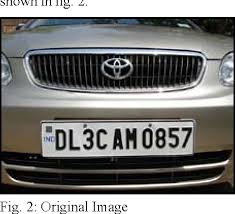

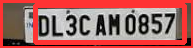

| DL3C AN 0857


In [30]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
 
img=cv2.imread("/content/images.jpg")
cv2_imshow(img)
fullImage,plate=extract_plate(img)
# load the example image and convert it to grayscale
gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
 
# check to see if we should apply thresholding to preprocess the
# image


preproc = "blur"
if preproc == "thresh":
	gray = cv2.threshold(gray, 0, 255,
		cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
# make a check to see if median blurring should be done to remove
# noise
elif preproc == "blur":
	gray = cv2.medianBlur(gray, 3)
 
# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
"""
kernel = np.ones((5,5),np.uint8)
gray = cv2.dilate(gray,kernel,iterations = 1)
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)
# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
"""

text = pytesseract.image_to_string(plate)
#os.remove(filename)
print(text)
 
# show the output images